In [ ]:
%load_ext autoreload
%autoreload 2

<div align="center">
    <hr> 
  <span style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    M2 - IPParis - Experimental Methods in Fluid Mechanics Acquisition - Signal processing
  </span>
  <hr> 
  <span style="font-family: Arial, sans-serif; font-size: 18px;"> 
    <span style="font-weight: bold;">Instructor:</span> Romain Monchaux - romain.monchaux@ensta.fr
  </span>
    <br>
    <br>
    <span style="font-family: Arial, sans-serif; font-size: 18px;"> 
        <span style="font-weight: bold;">Affiliation:</span> ENSTA-Paris - Institut Polytechnique de Paris
    </span>
    <hr> 
</div>

# 1 - Gaussian white noise

## Context

Gaussian white noise (GWN) is a statistical model of noise that combines two key properties: whiteness and a Gaussian distribution. It's a fundamental concept used in various fields like signal processing, communications, and physics to model random disturbances in a system.

#### White Noise
The term "white" refers to the noise's power spectral density (PSD), which is uniform across all frequencies. This is analogous to white light, which contains all frequencies (colors) of the visible spectrum in equal intensity. In a signal, this means the noise has no dominant frequency and is uncorrelated at different points in time. The noise at one instant has no statistical relationship to the noise at any other instant.

#### Gaussian Distribution
The term "Gaussian" means that the amplitude of the noise at any given moment follows a normal distribution, often visualized as a bell curve.

<div align="center">
  <img src="./images/gauss.jpeg" alt="Gaussian distribution" style="height: 400px;">
</div>

<div align="center">
    <hr> 
</div>

### Questions

<div align="center">
    <hr> 
</div>

#### Question - 1 

Create a figure showing the raw time signal. Use the x-axis controls to zoom in and out on the data, and analyze the signal's behavior at both macro and micro scales.

<div style="background-color: #e0f2f1;">
  <span style="font-weight: bold;">Hint:</span> For this purpose, we'll use the well-known Python library Matplotlib. The data you'll be using is located in **../data/sig1.mat** and is called **'sig1.mat'**
</div>

In [2]:
## Here we are importing required libraries 
import matplotlib.pyplot as plt ## -> for plotting
import scipy.io ## -> for accessing the mat file from python

In [3]:
# Loading signal data
temp1 = scipy.io.loadmat('../data/sig1.mat')
t1 = temp1['t'].flatten()      # get time vector t1
Sig1 = temp1['Sig1'].flatten() # get signal vector
Fs1 = int(temp1['Fs'].item())         # get sampling frequency

fdfd


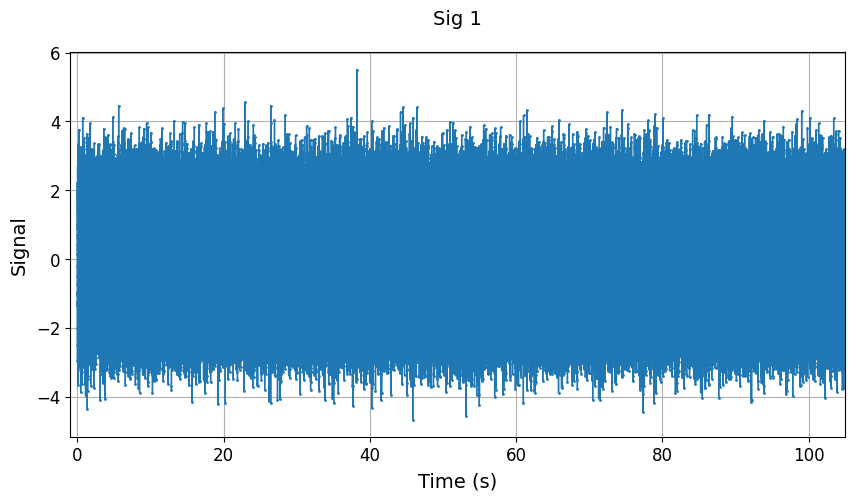

In [4]:
##########################################
## Plotting routine
##########################################
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

ax.plot(t1, Sig1, marker = ".", markersize=2, linewidth = 1, 
        markerfacecolor = "tab:blue", markeredgecolor="tab:blue", color="tab:blue")

ax.set_xlabel("Time (s)", fontsize = 14, labelpad = 5)
ax.set_ylabel("Signal", fontsize = 14, labelpad = 5)
ax.set_title("Sig 1", fontsize = 14, pad = 20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

lim_min_x = t1.min()
lim_max_x = t1.max()

if lim_min_x > 0:
    lim_min_x = 0

ax.set_xlim(lim_min_x-1, int(lim_max_x*1.01))
ax.grid()

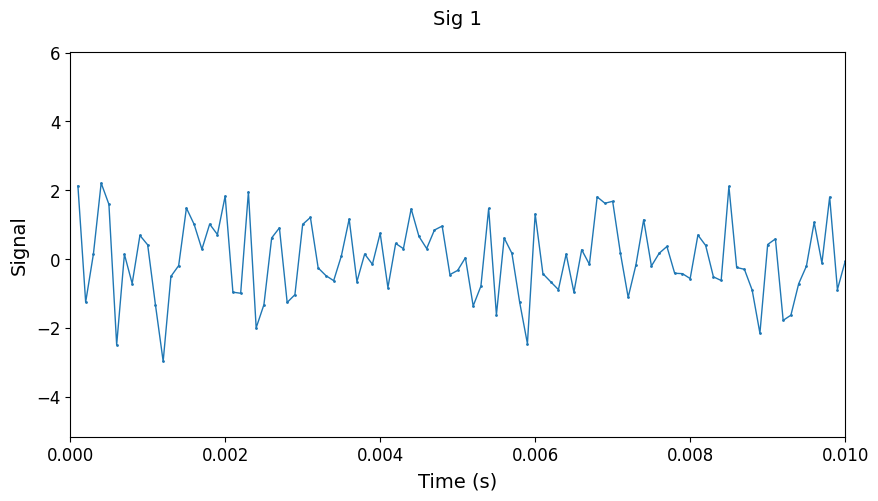

In [6]:
## Define your limits here
##########################################
xmin = 
xmax = 
##########################################

##########################################
## Plotting routine
##########################################
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

ax.plot(t1, Sig1, marker = ".", markersize=2, linewidth = 1, 
        markerfacecolor = "tab:blue", markeredgecolor="tab:blue", color="tab:blue")

ax.set_xlabel("Time (s)", fontsize = 14, labelpad = 5)
ax.set_ylabel("Signal", fontsize = 14, labelpad = 5)
ax.set_title("Sig 1", fontsize = 14, pad = 20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

ax.set_xlim([xmin,xmax/1000])
plt.show()
##########################################

In [ ]:
plt.savefig('./figures/BBG_de_tps_'+str(xmax)+'.png',  bbox_inches = 'tight')

<div align="center">
    <hr> 
</div>

#### Question - 2

Now, you'll estimate the average and standard deviation of the signal using a varying number of data points. To do this, create a vector called NbPt with a set of increasing values. This will allow you to study how the number of points influences the accuracy of these statistical estimates. Finally, compare your results with the concepts discussed in the lecture.

<div style="background-color: #e0f2f1;">
  <span style="font-weight: bold;">Hint:</span> To make our life easier, we will be using an another library called numpy to help us
</div>

In [7]:
## Here we are importing required libraries 
import numpy as np ## -> Extremely useful library for matrix operations

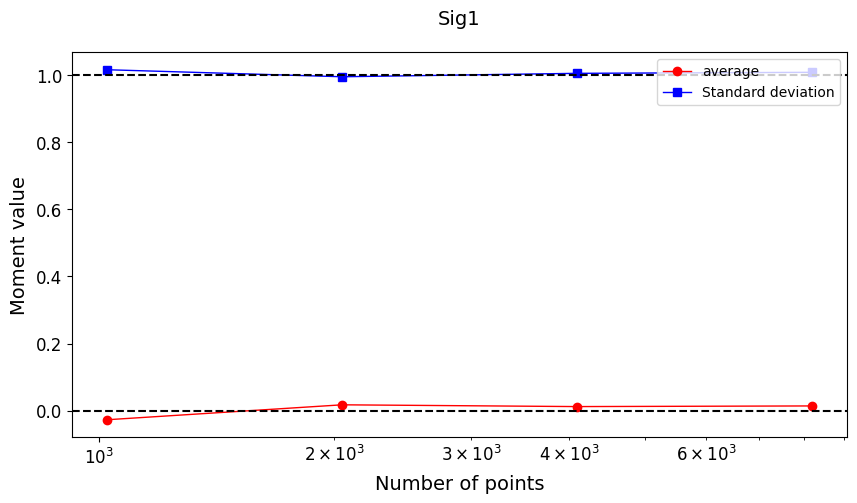

In [9]:
##########################################
## Define your numpy array here. 
## To create a numpy array, you can use 
## np.array([xx, xx, xx ...]) where 
## xx are the values that you will give
##########################################
NbPt = 2 ** np.array([xx, xx, xx, xx])

##########################################
## Calculation of average and standard deviation by numpy
##########################################
average, standardev = [],[]
for nbpt in NbPt:
    Data = Sig1[:nbpt]
    average.append(np.mean(Data))
    standardev.append(np.std(Data))
##########################################

##########################################
## Plotting routine
##########################################
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

## Plotting average values
ax.plot(NbPt, average, marker = "o", markerfacecolor = "red", markeredgecolor = "red", 
        linewidth = 1, color = "red", label = "average")

## Plotting standard deviation
ax.plot(NbPt, standardev, marker = "s", markerfacecolor = "blue", markeredgecolor = "blue", 
        linewidth = 1, color = "blue", label = "Standard deviation")

ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=1, color='black', linestyle='--')
ax.set_xlabel('Number of points', fontsize = 14, labelpad = 5)
ax.set_ylabel('Moment value', fontsize = 14, labelpad = 5)
ax.set_title('Sig1', fontsize = 14, pad = 20)
ax.set_xscale('log')
ax.legend(loc = "upper right")

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
##########################################

##########################################
## Saving figure here
fig.savefig('./figures/BBG_Moy_de_N.png',  bbox_inches = 'tight')

<div align="center">
    <hr> 
</div>

#### Question - 3

Now, we'll estimate the probability density function of this Gaussian white noise. To begin, we'll explore different representations of the function.

* Set the number of successive data points (NbPt) to 220 and the number of bins (NbBin) to 100.
* Run the code cell. This will generate three different plots of the same probability density function, each highlighting a unique aspect of the data.
* Analyze and comment on the results.

<div style="background-color: #e0f2f1;">
  <span style="font-weight: bold;">Hint:</span> To make our life easier, we will be using numpy again! We have created in-houde functions that already exist in python, feel free to use built-in functions 
</div>

In [11]:
##########################################
## Let us create the re-usable functions here
##########################################

## Function 1: Gaussian Probability Density Function (PDF)
def Gauss(x):
    """
    Calculates the value of the standard normal (Gaussian) PDF at a point x.
    Formula: f(x) = (1 / sqrt(2*pi)) * exp(-x^2 / 2)
    This function is useful for plotting a theoretical Gaussian distribution.
    """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-(x ** 2) / 2)

## Function 2: Estimating a PDF from a Signal
def Calc_PDF(SIG, NbBin):
    """
    Estimates the Probability Density Function (PDF) of a signal.
    
    This is done by creating a histogram and normalizing it so that the
    total area under the histogram is equal to 1. The `density=True` option
    in `np.histogram` handles this normalization automatically, which is
    more efficient and less prone to error than manual normalization.
    
    Args:
        SIG (numpy.ndarray): The input signal (a 1D array of numerical data).
        NbBin (int): The number of bins to use for the histogram.
        
    Returns:
        tuple: A tuple containing two numpy arrays:
               - Bin_Centers (numpy.ndarray): The center values of each bin.
               - PDF (numpy.ndarray): The estimated PDF values for each bin.
    """
    # Use np.histogram with the 'density=True' option.
    # This directly returns the PDF values for each bin.
    PDF, Bin_Edges = np.histogram(SIG, bins=NbBin, density=True)
    
    # Calculate the center of each bin for plotting.
    # np.diff() calculates the difference between consecutive bin edges.
    # The result is a simple and accurate way to find the center of each bar.
    Bin_Centers = Bin_Edges[:-1] + np.diff(Bin_Edges) / 2
    
    return Bin_Centers, PDF

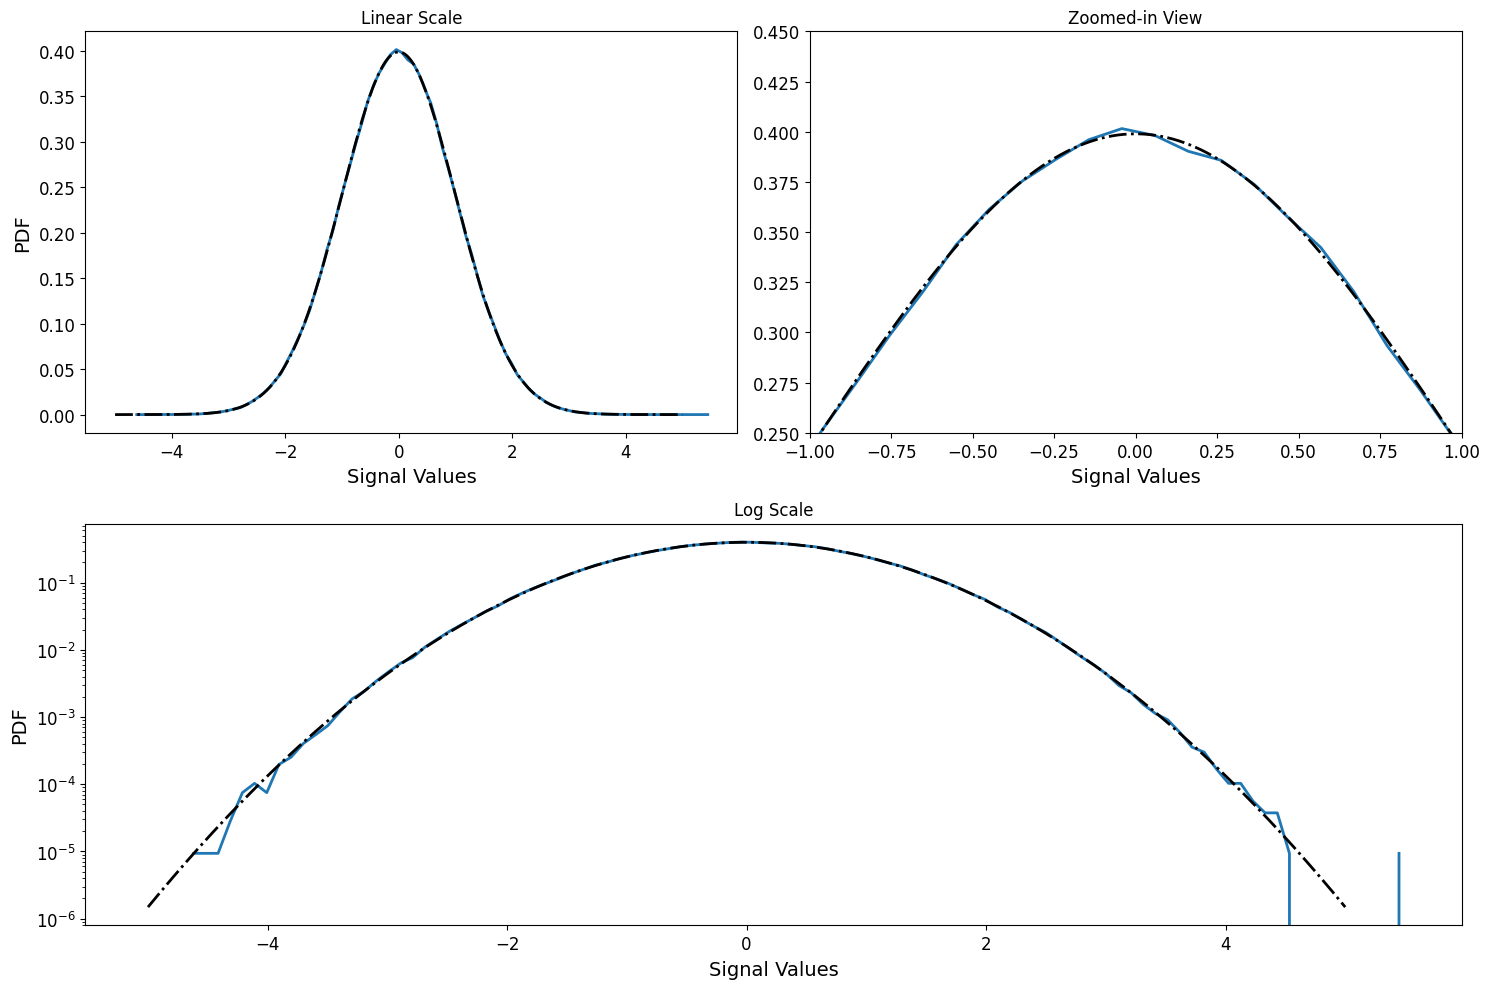

In [ ]:
##########################################
## Here set the number of bins and points
##########################################
NbPt = XX
NbBin = XX

Bin,PDF = Calc_PDF(Sig1[:NbPt], NbBin)
BG = np.linspace(-5,5,2**20)


##########################################
## Plotting routine
##########################################
# Create a figure
fig = plt.figure(figsize=(15, 10))

## First plot: Top-left
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(Bin, PDF, linewidth=2, color="tab:blue", linestyle="-")
ax1.plot(BG, Gauss(BG), linewidth=2, color="black", linestyle='-.')
ax1.set_xlabel('Signal Values', fontsize=14, labelpad=5)
ax1.set_ylabel('PDF', fontsize=14, labelpad=5)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)
ax1.set_title('Linear Scale')

## Second plot: Top-right
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(Bin, PDF, linewidth=2, color="tab:blue", linestyle="-")
ax2.plot(BG, Gauss(BG), linewidth=2, color="black", linestyle='-.')
ax2.set_xlabel('Signal Values', fontsize=14, labelpad=5)
ax2.set_ylim([0.25, 0.45])
ax2.set_xlim([-1, 1])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=12)
ax2.set_title('Zoomed-in View')

# Third plot: Bottom-center, spanning two columns
# This is the key change. We tell it to start at grid position (1, 0)
# and span 2 columns (colspan=2).
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(Bin, PDF, linewidth=2, color="tab:blue", linestyle="-")
ax3.plot(BG, Gauss(BG), linewidth=2, color="black", linestyle='-.')
ax3.set_xlabel('Signal Values', fontsize=14, labelpad=5)
ax3.set_ylabel('PDF', fontsize=14, labelpad=5)
ax3.set_yscale('log')
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='minor', labelsize=12)
ax3.set_title('Log Scale')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('./figures/BBG_PDF_0.png', bbox_inches='tight')


In [ ]:
<div align="center">
    <hr> 
</div>

#### Question - 4

Now, let's examine the influence of the number of bins on our estimation.

* Choose a number of data points (NbPt) to sample from the original signal.
* Fill the NbBin vector with five increasing values.
* Run the code cell to generate five probability density function plots. Each plot will use the same NbPt value but a different number of bins from your NbBin vector.
* Determine the optimal number of bins, or intervals, that provides the best estimate of the probability density function.
* Plot this optimal number as a function of NbPt.
* Analyze and comment on the results, explaining the relationship between the number of bins and the number of data points.

<div style="background-color: #e0f2f1;">
  <span style="font-weight: bold;">Hint:</span> No need to import or write functions. We re-use!
</div>

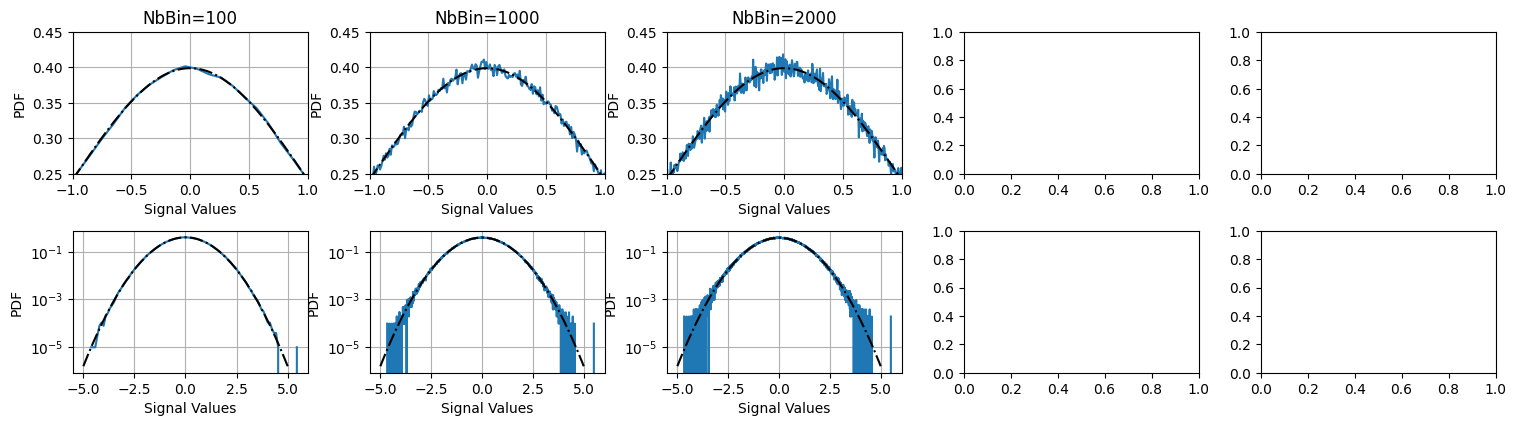

In [16]:
##########################################
## Here set the number of bins (as array)
## and points. To set an array, 
## [XX, XX, XX] where XX is the number that
## you will choose
##########################################
NbPt = 2**20
NbBin = [XX, XX, XX]

##########################################
## Plotting routine
##########################################
fig, ax = plt.subplots(2, 5, figsize=(15, 4), sharey=False)
fig.tight_layout(h_pad=2)

## Simply we are looping with the length of NbBin
for i, nbbin in enumerate(NbBin):
    Bin, PDF = Calc_PDF(Sig1[:NbPt], nbbin)
    ax[0,i%5].plot(Bin,PDF)
    ax[0,i%5].plot(BG,Gauss(BG),'-.k')
    ax[0,i%5].set_title('NbBin='+str(nbbin))
    ax[0,i%5].set_xlabel('Signal Values')
    ax[0,i%5].set_ylabel('PDF')
    ax[0,i%5].set_ylim([0.25,0.45])
    ax[0,i%5].set_xlim([-1,1])

    ax[0,i%5].grid()

    
    ax[1,i%5].plot(Bin,PDF)
    ax[1,i%5].plot(BG,Gauss(BG),'-.k')
    ax[1,i%5].set_yscale('log')
    ax[1,i%5].set_xlabel('Signal Values')
    ax[1,i%5].set_ylabel('PDF')

    ax[1,i%5].grid()
fig.savefig('./figures/BBG_PDF.png',  bbox_inches = 'tight')


In [ ]:
## Synthesis:
plt.figure()
plt.xlabel('Number of points')
plt.ylabel('Number of Bins')
plt.title('PDF convergence')
NbPt  = 2 ** np.array([10, 12, 16, 18, 20])
NbBin =    [25, 40, 65, 120, 200] 
plt.plot(NbPt, NbBin, 'ob',label = 'data points')
plt.plot(np.linspace(0, 10**6, 10**5), 2 * np.linspace(0, 10**6, 10**5)**(1/3),'-.k', label='y = 2 x^(1/3)')
plt.legend()
plt.savefig('./figures/BBG_synthese.png',  bbox_inches = 'tight')

<div align="center">
    <hr> 
</div>

# Question 2 - Spectrum and auto-correlation

## Context

Spectrum and autocorrelation are two fundamental concepts in signal processing used to analyze the properties of a signal, especially random or time-varying signals. They are two different but related ways of looking at the same information.

#### Autocorrelation
Autocorrelation measures the similarity between a signal and a time-shifted version of itself. Essentially, it tells you how much a signal resembles itself over different time lags.

* A high autocorrelation at a given time lag means the signal is highly correlated with its past values at that specific lag.
* A low or zero autocorrelation means the signal's past values do not predict its future values.

For example, a perfectly periodic signal, like a sine wave, will have a high autocorrelation at time lags equal to its period. White noise, on the other hand, is completely random and uncorrelated, so its autocorrelation function will be a sharp spike at a time lag of zero and zero everywhere else.


#### Spectrum
The spectrum of a signal, also known as its power spectral density (PSD), shows how the signal's energy or power is distributed across different frequencies. .

* A peak in the spectrum at a particular frequency indicates that the signal contains a strong periodic component at that frequency.
* A flat spectrum (like that of white noise) means the signal's energy is spread equally across all frequencies.

The spectrum is obtained by taking the Fourier Transform of the signal. This mathematical operation converts a signal from the time domain (amplitude vs. time) to the frequency domain (power vs. frequency).

#### The Relationship
The spectrum and autocorrelation are directly related through the welch theorem. This theorem states that the autocorrelation function and the power spectral density (spectrum) form a Fourier transform pair. It's a widely used and effective technique for analyzing the frequency content of noisy or non-stationary signals.

This means that if you know a signal's autocorrelation, you can find its spectrum by taking the Fourier transform, and vice versa. They are two sides of the same coin, providing complementary information about the same signal: autocorrelation describes a signal's properties in the time domain, while the spectrum describes them in the frequency domain.

### Exercises

<div align="center">
    <hr> 
</div>

#### Question - 1

Now, let's examine the influence of the number of bins on our estimation.

Now, you will estimate the power spectral density (PSD) of the Gaussian white noise. We will use the scipy.signal.welch function, which requires the following six inputs:

* **Sig1[1:NbPoint]:** The signal, limited to a specific number of data points.
* **Fs:** The sampling frequency of the signal.
* **window:** The type of window function to apply (e.g., 'hann').
* **nperseg:** The length of each segment used in the Welch method.
* **Noverlap:** The number of overlapping points between consecutive segments.
* **Nfft:** The number of points for the Fast Fourier Transform (FFT).

Your task is as follows:

1. Plot the spectrum of the Gaussian white noise using different window lengths (nperseg).
2. Describe the results you obtain for each plot.
3. Calculate the frequency resolution of the spectrum in each case.
4. Explain how you would choose the arguments for scipy.signal.welch in a future scenario.

<div style="background-color: #e0f2f1;">
  <span style="font-weight: bold;">Hint:</span> To use welch theorem, we can use scipy.signal.welch! Another useful library!
</div>

In [ ]:
from scipy.signal import welch as welch
import numpy as np

In [ ]:
##########################################
## Here set the Nfft
##########################################
Nfft = 2**XX # number of points used for the FFT calculation
NbPoint = 2**20 # number of points in the signal
Noverlap = Nfft / 2 # number of overlaping points
Nwindow = Nfft # window length
Fs = Fs1 # sampling frequency

## Let us calculate using welch
F, Pxx = welch(Sig1[:NbPoint], 
               Fs, 
               window = 'hamming', 
               nperseg = Nwindow, 
               noverlap = Noverlap, 
               nfft = Nfft)



##########################################
## Plotting routine
##########################################
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

ax.plot(F, Pxx, marker = ".", markersize=2, linewidth = 1, 
        markerfacecolor = "tab:blue", markeredgecolor="tab:blue", color="tab:blue", label = rf"$\Delta f$={Fs/Nfft:.3f}")

ax.set_xlabel("Frequency (Hz)", fontsize = 14, labelpad = 5)
ax.set_ylabel("Power Spectral Density", fontsize = 14, labelpad = 5)
ax.set_title(f"L signal={2**int(np.log(Nwindow)/np.log(2))} - Nfft={2**int(np.log(Nfft)/np.log(2))}", fontsize=14, pad=20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

# ax.text(5000,0.0001, rf"$\Delta f$={Fs/Nfft:.3f}")

ax.legend(loc = "lower right", fontsize = 18)

ax.grid()

plt.show()

##########################################
## Saving figure here
##########################################
fig.savefig('./figures/BBG_DSP_Nfft'+str(Nfft)+'.png',  bbox_inches = 'tight')

<div align="center">
    <hr> 
</div>

#### Question - 2

Now, you will calculate and plot the autocorrelation of the Gaussian white noise.

1. **Generate the plot:** Calculate the autocorrelation of the signal and plot it as a function of time lag.
2. **Zoom in and out:** Adjust the horizontal axis to zoom in and out on the plot.
3. **Analyze and comment:** Describe the shape of the plot at different scales and explain what it tells you about the signal.

In [ ]:
##########################################
## Main calculations are here
##########################################
import numpy as np
test0 = Sig1[:50000] # shorten the calculation
test = test0 - np.mean(test0) # centering
testnorm = np.sum(test**2)
acor = np.correlate(test,test,mode="same") / testnorm
acor = acor[len(acor)//2:]

##########################################
## Plotting routine
##########################################

fig, ax = plt.subplots(ncols=1, nrows = 1, figsize = (10,5))

delta_t = np.linspace(0,len(acor)/Fs1, len(acor))

ax.plot(delta_t, acor, marker = "o", markersize=2, linewidth = 1, linestyle = "-",
        markerfacecolor = "tab:blue", markeredgecolor="tab:blue", color="tab:blue")

ax.set_xlabel(rf'$\Delta$ t', fontsize = 14, labelpad = 5)
ax.set_ylabel('Normalised autocorrelation', fontsize = 14, labelpad = 5)
ax.set_title(f"L signal={2**int(np.log(Nwindow)/np.log(2))} - Nfft={2**int(np.log(Nfft)/np.log(2))}", fontsize=14, pad=20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

ax.grid()

ax.set_xlim(-0.001,.01)
    
plt.show()

##########################################
## Saving figure here
##########################################
fig.savefig('./figures/BBG_Autocorr.png',  bbox_inches = 'tight')